<a href="https://colab.research.google.com/github/Krishnakalani111/Mushroom-classification/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('MushroomClassification.csv')


to maximize every column, to view all the columns. we use the 'set_option' method.

In [ ]:
pd.set_option('display.max_columns',None)
data.head()


In [ ]:
data.tail()

finding shape of the dataset( no of rows and columns using the shape attribute of pandas

In [ ]:
data.shape

(8124, 23)

using info method for knowing dataypes of each column and memory requirment.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

checking null values in dataset, and sum method for counting the null values in all the columns respectively.

In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
data.describe() 

# DATA MANIPULATION

as ML algorithms understands numerical value, and our classes(columns) are in categorical values we need to encode them into numerical v. 

also as our datatype of classes is object, and for applying label encoding we require categorical column to be catagorical data type(which we found out from info) 

In [ ]:
data=data.astype('category')

In [ ]:
data.dtypes

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data.columns:
  data[column] = le.fit_transform(data[column])

In [ ]:
data.head()

# Storing feature matrix in X and target in vector y

In [ ]:
X = data.drop('class',axis=1)
y=  data['class']

# APPLYING PCA

PCA REDUCES THE DIMENSION AND RETAINS THE IMPORTANT INFORMATION. AS DATA PROCESSING IS AN INTENSE PROCESS, WE REDUCE THE FEATURES (AND RETAIN THE IMPORTANT ONE)

In [ ]:
from sklearn.decomposition import PCA
pca1= PCA(n_components=7)
pca_fit = pca1.fit_transform(X)

now by adding the variance ratio we can know the information we retained.

In [ ]:
Pca= pca1.explained_variance_ratio_
sum(Pca)

0.8501681635086217

# splitting,training,pedicting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(pca_fit,y, test_size=0.20 ,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

# evaluating 

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy LR",accuracy_score(y_test,y_pred))

Accuracy LR 0.8258461538461539


In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[702, 118],
       [165, 640]])

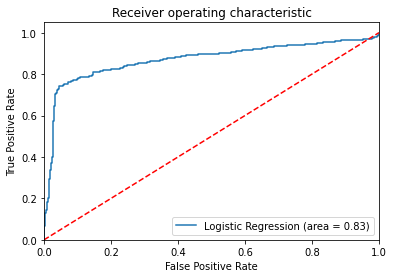

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()